In [15]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
from langchain_groq import ChatGroq

groq_api_key=os.getenv("GROQ_API_KEY")
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x172decf40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x177047f70>, model_name='Llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [17]:
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)


In [18]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [19]:
speech


'\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the gove

In [31]:
chat_message=[
    SystemMessage(content="You are expert with experise in summarizing speech"),
    HumanMessage(content=f"Please provide a short and concisse summary of the follow speech:\n Text:{speech}")
]

In [32]:
llm.get_num_tokens(speech)

909

In [33]:
llm(chat_message).content

'Here is a short and concise summary of the speech:\n\nThe speaker, a Member of Parliament, is participating in the "Viksit Bharat Sankalp Yatra" (Developed India Resolution Journey) to ensure that government schemes reach the intended beneficiaries without any hassles. He highlights the importance of ensuring that government plans are implemented effectively, citing examples of successful schemes such as the Pradhan Mantri Awas Yojana (Prime Minister\'s housing scheme) and Ayushman card. The speaker emphasizes the need to check if government work is indeed reaching those it is meant for and shares stories of people who have benefited from government schemes, including a widow who received financial assistance under the Jeevan Jyoti scheme. He concludes by highlighting the positive impact of the "Viksit Bharat Sankalp Yatra" on government officers, who feel satisfied knowing that their work has directly impacted people\'s lives positively.'

### Prompt template text summarization

In [35]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generictemplate="""
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {language}
"""

prompt=PromptTemplate(
    input_variables=['speech','language'],
    template=generictemplate
)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nSpeech:{speech}\nTranslate the precise summary to {language}\n')

In [36]:
complete_prompt=prompt.format(speech=speech,language="French")
complete_prompt

'\nWrite a summary of the following speech:\nSpeech:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses

In [37]:
llm.get_num_tokens(complete_prompt)

931

In [40]:
llm_chain=LLMChain(llm=llm,prompt=prompt)
summary=llm_chain.run({'speech':speech,'language':'telugu'})
summary

'Here is a precise summary of the speech in Telugu:\n\nదేశంలో అనేక మంది ప్రభుత్వ, రాజకీయ, సామాజిక కార్యక్రమాలకు సంబంధించిన వారు "విక్సిత్ భారత్ సంకల్ప యాత్ర" సఫలమయ్యేలా ప్రయత్నిస్తున్నారు. కాబట్టి, నేను ఈ కార్యక్రమానికి సంబంధించిన ప్రతినిధుల హక్కును ప్రామాణికంగా చేస్తున్నాను.\n\nమన దేశంలో ప్రభుత్వాలు రావడం, ప్రణాళికలు రూపొందించడం, చర్చలు జరిపడం, పెద్ద హామీలు ఇవ్వడం జరిగింది. కానీ నా అనుభవం మరియు దృష్టి ప్రభుత్వ ప్రణాళికలు లభించిన ప్రాంతాలకు చేరుకోవడం ద్వారా సర్వసాధారణంగా ఉంటే అధిక సంఖ్యాకులకు తగినంత సంబంధం లేదు. అందువలన, నేను దేశంలో మళ్ళీ పర్యటించి, ప్రభుత్వ ప్రణాళికల ప్రభావం తెలుసుకోవాలని నిర్ణయించాను.\n\nప్రభుత్వ ప్రణాళికలు ఉన్నాయి, కానీ అవి లభించిన ప్రాంతాలకు చేరుకోవడం ద్వారా సర్వసాధారణంగా ఉంటే అధిక సంఖ్యాకులకు తగినంత సంబంధం లేదు. అందువలన, ప్రభుత్వ అధికారులు వారి పనిని సమర్ధవంతంగా చేసుకుంటారు.'

### 1. Stuff documentation chain text summarization

pdf-> prompt template -> LLM -->o/p

if pdf is of 10 different douments this will combine all the documents and sent to the prompt template 

challenges: if pdf is of larger size it will not be possible to send to prompt template.

### 2. Map Reduce summarization ->Larger files 

document --> divide into smaller chunks -->prompt template --> LLM --> summary1 , summary2 , summary 3 , summary4.
combine all the summaries and give final summary 
1. Takes all the final summary and give it to another prompt template and getting the final summary.

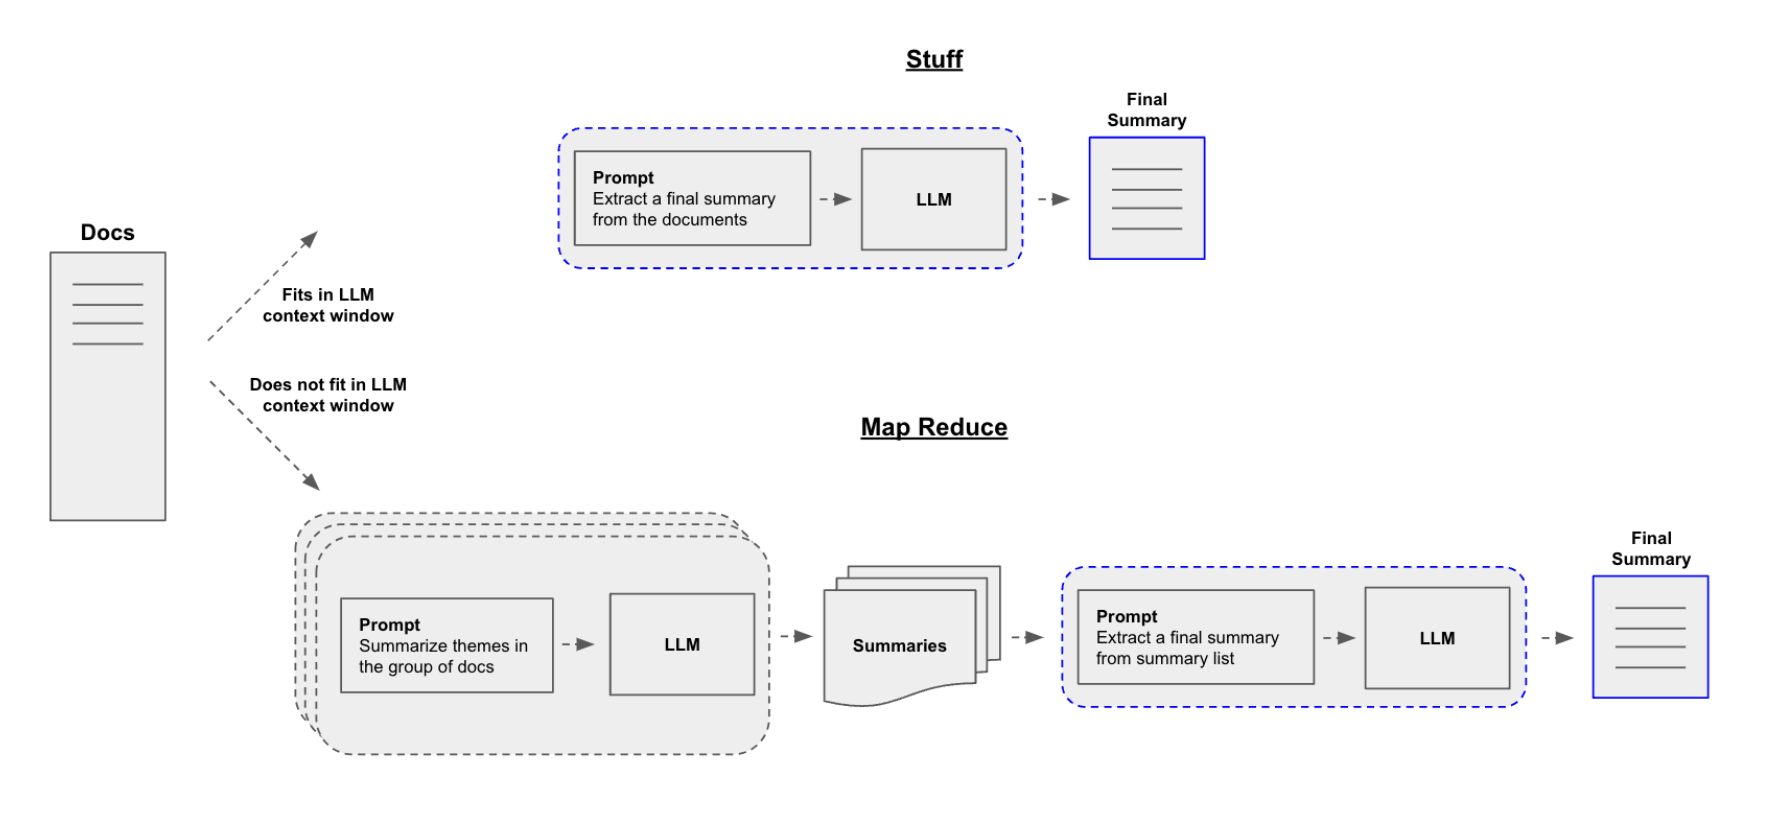
###  A. Single prompt Template

### B. Multiple prompt Template

### 3. Refine Chain Summarization

documents--> chunks1 --> prompt --> LLM --> summarization

chunks2 (combine with summarization of chunk1) --> prompt --> LLM--> 


In [41]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [42]:
template=""" Write a concise and short summary of the following speech,
Speech :{text}

 """
prompt=PromptTemplate(input_variables=['text'],
                      template=template)


In [43]:
from langchain.chains.summarize import load_summarize_chain

In [44]:
chain=load_summarize_chain(llm,chain_type='stuff',prompt=prompt,verbose=True)
output_summary=chain.run(docs)
output_summary

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Prompt after formatting:
 Write a concise and short summary of the following speech,
Speech :A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have many unique experiences to share with you, which signify the 


'Here is a concise and short summary of the speech:\n\nPresident A.P.J. Abdul Kalam\'s departing speech highlights the importance of accelerating development, empowering villages, mobilizing rural core competence, and overcoming disasters through partnership. He emphasizes the need for a developed India by 2020 and outlines the following 10 key messages:\n\n1. Accelerate development, led by the aspirations of the youth.\n2. Empower villages to take charge of their development.\n3. Mobilize rural core competence for competitiveness.\n4. Focus on "Seed to Food" to boost agricultural growth.\n5. Defeat problems and succeed through partnership.\n6. Overcome the impact of disasters through cooperation.\n7. Demonstrate courage in combating calamities.\n8. Foster connectivity for societal transformation.\n9. Defend the nation with pride and dedication.\n10. Empower the youth to become enlightened citizens for a developed India.\n\nThe President emphasizes the importance of value-based educati

### Map Reuce text summerization 

In [45]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [46]:
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [47]:
final_documents=RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=100).split_documents(docs)
final_documents


[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [48]:
len(final_documents)

13

In [52]:
chunks_prompt="""
Please summarize the below speech:
Speech:`{text}'
Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [54]:
final_prompt='''
Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:{text}

'''
final_prompt_template=PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivation Title,Start the precise summary with an introduction and provide the summary in number \npoints for the speech.\nSpeech:{text}\n\n')

In [55]:
summary_chain=load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template,
    verbose=True
)

output=summary_chain.run(final_documents)
output

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Prompt after formatting:

Please summarize the below speech:
Speech:`A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have many unique experiences to share with you, which signify the 
following important mess

Token indices sequence length is longer than the specified maximum sequence length for this model (2116 > 1024). Running this sequence through the model will result in indexing errors
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:President A.P.J. Abdul Kalam is delivering his farewell speech after completing five years in office. He expresses gratitude to the people of India and those living abroad for the opportunity to work with them. He highlights 10 important messages he has learned during his tenure, including:

1. Accelerating development through the aspirations of the youth
2. Empowering villages
3. Mobilizing rural core competence for competitiveness
4. Fostering agricultural growth through "Seed to Food"
5. Overcoming problems and succeeding with determination
6. Partnering to overcome challenges
7. Showing courage in the face of calamities
8. Building connectivity for societal transformation
9. Defending the nation with pride
10. Promoting a youth mo

'**Motivation Title:** "A Vision for a Developed India: Empowering Youth for a Brighter Future"\n\n**Summary:**\n\nHere are the key points from the speech:\n\n1. **Gratitude**: Dr. A.P.J. Abdul Kalam expresses his gratitude to the people of India and those living abroad for the opportunity to work with them.\n\n2. **10 Important Messages**: He highlights 10 important messages he has learned during his tenure, including accelerating development through youth aspirations, empowering villages, and promoting a youth movement for a developed India by 2020.\n\n3. **Empowering Youth**: The speaker emphasizes the importance of empowering youth to work towards a prosperous, safe, and proud India.\n\n4. **PURA Initiative**: He discusses the success of the Periyar PURA (Participatory Urban Rural Approach) initiative, which has led to the creation of entrepreneurs and employment opportunities in rural areas.\n\n5. **Agricultural Growth**: The speaker emphasizes the importance of agriculture in the

## Refine chain summarization


In [56]:
chain=load_summarize_chain(
    llm=llm,
    chain_type="refine",
    verbose=True
)
output_summary=chain.run(final_documents)
output_summary

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have many unique experiences to share with you, which signify the 
following important mes

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, which included accelerating development, empowering villages, mobilizing rural core competence, and defeating problems through partnership. He also shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, and assured her that it was a thoughtful question and a goal worth striving for.
We have the opportunity to refine the existing summary (only if needed) with some more context below.
------------
appreciated the question and said it was indeed a thoughtful question and as sured her that 
that her dream would be taken to the highest institution of the nation and we would work
------------
Given the new context, refine the original summary.
If the 

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: Here is the refined summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, which included accelerating development, empowering villages, mobilizing rural core competence, and defeating problems through partnership. He also shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality.
We have the opportunity to refine the existing summary (only if needed) with some more context below.
------------
for it to achieve before 2020. This question reflects how the desire t o live in develo

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: Here is the refined summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, including empowering villages, mobilizing rural core competence, and defeating problems through partnership. He also shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, reflecting the desire of the youth to live in a developed India. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality. He emphasized that the aspirations of the young to live in a prosperous, safe, and proud India should be the guiding factor in their professions. He also shared his exp

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: Based on the provided context, I'm refining the original summary to incorporate the new information. Here is the revised summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, including empowering villages, mobilizing rural core competence, and defeating problems through partnership. He also shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, reflecting the desire of the youth to live in a developed India. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality. He emphasized that the aspirations of the young to live in a prospe

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: Here is the refined summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, including empowering villages, mobilizing rural core competence, and defeating problems through partnership. He also shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, reflecting the desire of the youth to live in a developed India. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality. He emphasized that the aspirations of the young to live in a prosperous, safe, and proud India should be the guiding factor in their professions.

He also shared his ex

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: Here is the refined summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, including empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, reflecting the desire of the youth to live in a developed India. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality.

He also shared his experiences meeting over 6000 farmers from across India, who evinced keen interest in the various gardens at Rashtrapati Bhavan. He emphasized the need t

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: Here is the refined summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, including empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, reflecting the desire of the youth to live in a developed India. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality.

He also shared his experiences meeting over 6000 farmers from across India, who evinced keen interest in the various gardens at Rashtrapati Bhavan. He emphasized the need t

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: After refining the summary with the new context, here is the final summary:

President A.P.J. Abdul Kalam delivered a farewell speech, thanking the nation for an enriching five-year tenure. He highlighted 10 important messages, including empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared a personal anecdote about a young girl asking why India couldn't become a developed nation by 2020, reflecting the desire of the youth to live in a developed India. President Kalam appreciated the question, calling it thought-provoking, and assured the girl that her dream would be taken to the highest institution of the nation, where they would work together to make it a reality.

He also shared his experiences meeting over 6000 farmers from across India, who evinced keen interest in the various gardens 

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: After refining the summary with the new context, here is the final summary:

President A.P.J. Abdul Kalam delivered a farewell speech, highlighting his achievements and experiences during his five-year tenure. He emphasized the importance of empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared stories of overcoming challenges, including his interactions with farmers, international initiatives, and visits to disaster-stricken areas. President Kalam also spoke about his initiative, the Pan African e-Network, a project to provide seamless and integrated connectivity to 53 African countries.

He recalled his experiences meeting over 6,000 farmers, who showed great interest in the various gardens at Rashtrapati Bhavan, and emphasized the need to double agricultural production with reduced land,

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: After refining the summary with the new context, here is the final summary:

President A.P.J. Abdul Kalam delivered a farewell speech, highlighting his achievements and experiences during his five-year tenure. He emphasized the importance of empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared stories of overcoming challenges, including his interactions with farmers, international initiatives, and visits to disaster-stricken areas. President Kalam also spoke about his initiative, the Pan African e-Network, a project to provide seamless and integrated connectivity to 53 African countries.

He discussed the importance of transforming India's youth into enlightened citizens, citing the Lead India 2020 Foundation, created by Dr. N.B. Sudershan in Hyderabad, which has trained thousands of stude

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: After refining the summary with the new context, here is the final summary:

President A.P.J. Abdul Kalam delivered a farewell speech, highlighting his experiences and achievements during his five-year tenure. He emphasized the importance of empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared stories of overcoming challenges, including international initiatives, visits to disaster-stricken areas, and interactions with farmers. President Kalam also spoke about his initiative, the Pan African e-Network, a project to provide seamless and integrated connectivity to 53 African countries.

He discussed the importance of transforming India's youth into enlightened citizens, citing the Lead India 2020 Foundation, created by Dr. N.B. Sudershan in Hyderabad, which has trained thousands of students 

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.
Prompt after formatting:
Your job is to produce a final summary.
We have provided an existing summary up to a certain point: After refining the summary with the new context, here is the final summary:

President A.P.J. Abdul Kalam delivered a farewell speech, highlighting his experiences and achievements during his five-year tenure. He emphasized the importance of empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared stories of overcoming challenges, including international initiatives, visits to disaster-stricken areas, and interactions with farmers. President Kalam also spoke about his initiative, the Pan African e-Network, a project to provide seamless and integrated connectivity to 53 African countries.

He discussed the importance of transforming India's youth into enlightened citizens, citing the Lead India 2020 Foundation, created by Dr. N.B. Sudershan in Hyderabad, which has trained thousands of students 

"After refining the summary with the new context, here is the final summary:\n\nPresident A.P.J. Abdul Kalam delivered a farewell speech, highlighting his experiences and achievements during his five-year tenure. He emphasized the importance of empowering villages, mobilizing rural core competence, and defeating problems through partnership. He shared stories of overcoming challenges, including international initiatives, visits to disaster-stricken areas, and interactions with farmers. President Kalam also spoke about his initiative, the Pan African e-Network, a project to provide seamless and integrated connectivity to 53 African countries.\n\nHe discussed the importance of transforming India's youth into enlightened citizens, citing the Lead India 2020 Foundation, created by Dr. N.B. Sudershan in Hyderabad, which has trained thousands of students in Andhra Pradesh. He shared inspiring stories of students from Medak district, who have shown significant improvements in self-discipline,